# RESNET 50
source: https://www.kaggle.com/natevegh/pneumonia-detection-98-acc-fastai-2019-update

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [3]:
bs = 64

In [4]:
path = Path()/'data'/'chest_xray'
path.ls()

[WindowsPath('data/chest_xray/test'),
 WindowsPath('data/chest_xray/train'),
 WindowsPath('data/chest_xray/val')]

torch.Size([3, 1225, 1632])


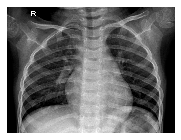

In [5]:
img = open_image(path/'val'/'NORMAL'/'NORMAL2-IM-1440-0001.jpeg')
print(img.data.shape)
img.show()

In [6]:
tfms = get_transforms()

In [7]:
np.random.seed(7)
data = ImageDataBunch.from_folder(path, 
                                  valid='val',
                                  valid_pct=0.2,
                                  size=256, bs=bs,
                                  ds_tfms=tfms).normalize(imagenet_stats)

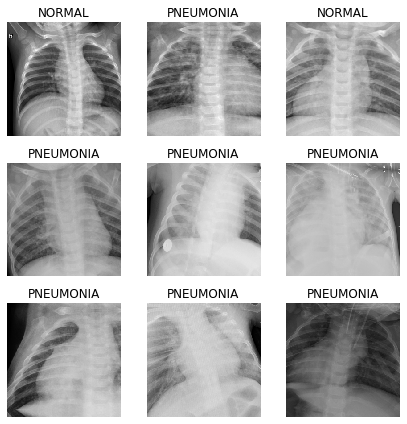

In [8]:
data.show_batch(3, figsize=(6,6))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['NORMAL', 'PNEUMONIA'], 2, 4685, 1171)

> - we have a very small validation set so some augmentation is needed

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, 
                    model_dir=(path/'models')).to_fp16()

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.333577,0.251682,0.084543,01:43
1,0.205019,0.169654,0.059778,01:37
2,0.158787,0.135297,0.050384,01:38
3,0.145204,0.151169,0.058070,01:39


In [12]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


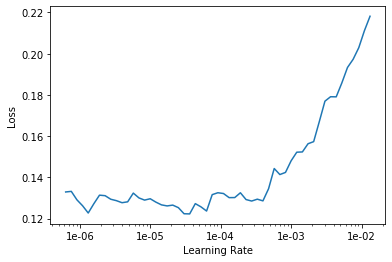

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(10, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.120767,0.117559,0.041845,01:38
1,0.108999,0.138949,0.049530,01:39
2,0.115409,0.076846,0.026473,01:39
3,0.092098,0.093695,0.034159,01:38
4,0.076277,0.070890,0.027327,01:39
5,0.062388,0.069075,0.023911,01:38
6,0.047765,0.065952,0.024765,01:38
7,0.047415,0.068483,0.023911,01:39
8,0.039149,0.067614,0.023911,01:38
9,0.033712,0.076951,0.029035,01:38


In [17]:
learn.save('stage-2')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

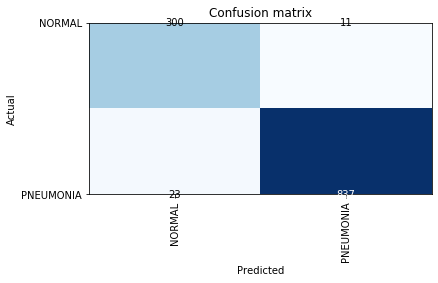

In [19]:
interp.plot_confusion_matrix()

In [20]:
learn.load('stage-1')
learn.unfreeze()

In [21]:
learn.fit_one_cycle(30, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.124247,0.117606,0.048676,01:39
1,0.108557,0.107179,0.041845,01:39
2,0.100571,0.102053,0.037575,01:38
3,0.086034,0.103180,0.035013,01:39
4,0.076793,0.092934,0.036721,01:38
5,0.077243,0.136798,0.050384,01:39
6,0.074121,0.111527,0.038429,01:38
7,0.068838,0.169564,0.057216,01:38
8,0.067945,0.076401,0.024765,01:39
9,0.060607,0.123526,0.041845,01:39


In [22]:
learn.save('stage-3')

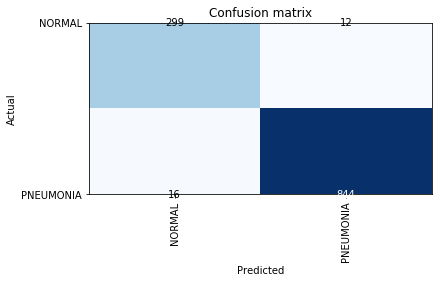

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()